In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [3]:
img = cv2.imread('download.jpg', 0)

In [4]:
img_float32 = np.float32(img)

In [5]:
dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

In [6]:
dct = cv2.dct(img_float32)
# dct_shift = np.fft.fftshift(dct)

In [7]:
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
phase = np.arctan2(dft_shift[:,:,1],dft_shift[:,:,0])

In [8]:
dct_magnitude_spectrum = 20 * np.log(np.abs(dct))

In [57]:
hist = cv2.calcHist([magnitude_spectrum], [0], None, [256], [0, 256])
hist = cv2.normalize(hist, hist)

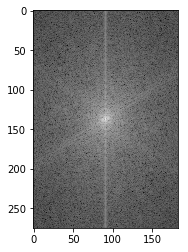

In [4]:
imfft = np.fft.fft2(img)
mags = np.abs(np.fft.fftshift(imfft))
visual = np.log(mags)
visual2 = (visual - visual.min()) / (visual.max() - visual.min())*255
plt.imshow(visual2.astype(np.uint8), cmap='gray')

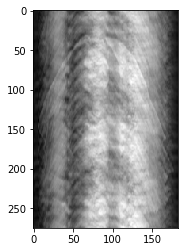

In [19]:
J = imfft.copy()
J[np.argwhere(np.abs(imfft)<255)] = 0
img_back = np.abs(np.fft.ifft2(J))
plt.imshow(img_back.astype(np.uint8), cmap='gray')

195.415615234375
[[5930272.    1178292.     429286.66  ...  514270.53   429286.66
  1178292.   ]
 [1686682.4    257559.12    74679.336 ...  489542.75   361442.56
    69638.59 ]
 [ 637262.6    203576.61   175115.69  ...  273994.03   126476.08
   351580.06 ]
 ...
 [ 328257.66   245412.23   106498.31  ...   98101.586  112491.3
   334143.53 ]
 [ 637262.7    351580.06   126476.08  ...  154578.92   175115.69
   203576.61 ]
 [1686682.4     69638.59   361442.56  ...  218353.      74679.336
   257559.12 ]]
[[  1 138]
 [  2 120]
 [  4  90]
 ...
 [271  93]
 [273  63]
 [274  45]]


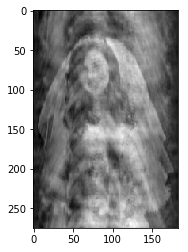

In [164]:
dft_10 = dft.copy()
thresh_value_10 = np.percentile(cv2.magnitude(dft_10[:,:,0],dft_10[:,:,1]), 1)
print(thresh_value_10)
print(cv2.magnitude(dft_10[:,:,0],dft_10[:,:,1]))
print(np.argwhere(cv2.magnitude(dft_10[:,:,0],dft_10[:,:,1])<thresh_value_10))
dft_10[np.argwhere(cv2.magnitude(dft_10[:,:,0],dft_10[:,:,1])<thresh_value_10)] = 0
img_10 = cv2.idft(dft_10)
img_10 = cv2.magnitude(img_10[:,:,0],img_10[:,:,1])
plt.imshow(img_10, cmap='gray')

In [60]:
dft_10 = dft.copy()
thresh_value_10 = np.percentile(np.abs(dft_10), 10)
dft_10[np.argwhere(np.abs(dft_10)<thresh_value_10)] = 0
dft_ishift_10 = np.fft.ifftshift(dft_10)
img_10 = cv2.idft(dft_ishift_10)
img_10 = cv2.magnitude(img_10[:,:,0], img_10[:,:,1])

dft_55 = dft.copy()
thresh_value_55 = np.percentile(np.abs(dft_55), 55)
dft_55[np.argwhere(np.abs(dft_55)<thresh_value_55)] = 0
dft_ishift_55 = np.fft.ifftshift(dft_55)
img_55 = cv2.idft(dft_ishift_55)
img_55 = cv2.magnitude(img_55[:,:,0], img_55[:,:,1])

dft_90 = dft.copy()
thresh_value_90 = np.percentile(np.abs(dft_90), 90)
dft_90[np.argwhere(np.abs(dft_90)<thresh_value_90)] = 0
dft_ishift_90 = np.fft.ifftshift(dft_90)
img_90 = cv2.idft(dft_ishift_90)
img_90 = cv2.magnitude(img_90[:,:,0], img_90[:,:,1])

dft_99 = dft.copy()
thresh_value_99 = np.percentile(np.abs(dft_99), 99)
dft_99[np.argwhere(np.abs(dft_99)<thresh_value_99)] = 0
dft_ishift_99 = np.fft.ifftshift(dft_99)
img_99 = cv2.idft(dft_ishift_99)
img_99 = cv2.magnitude(img_99[:,:,0], img_99[:,:,1])

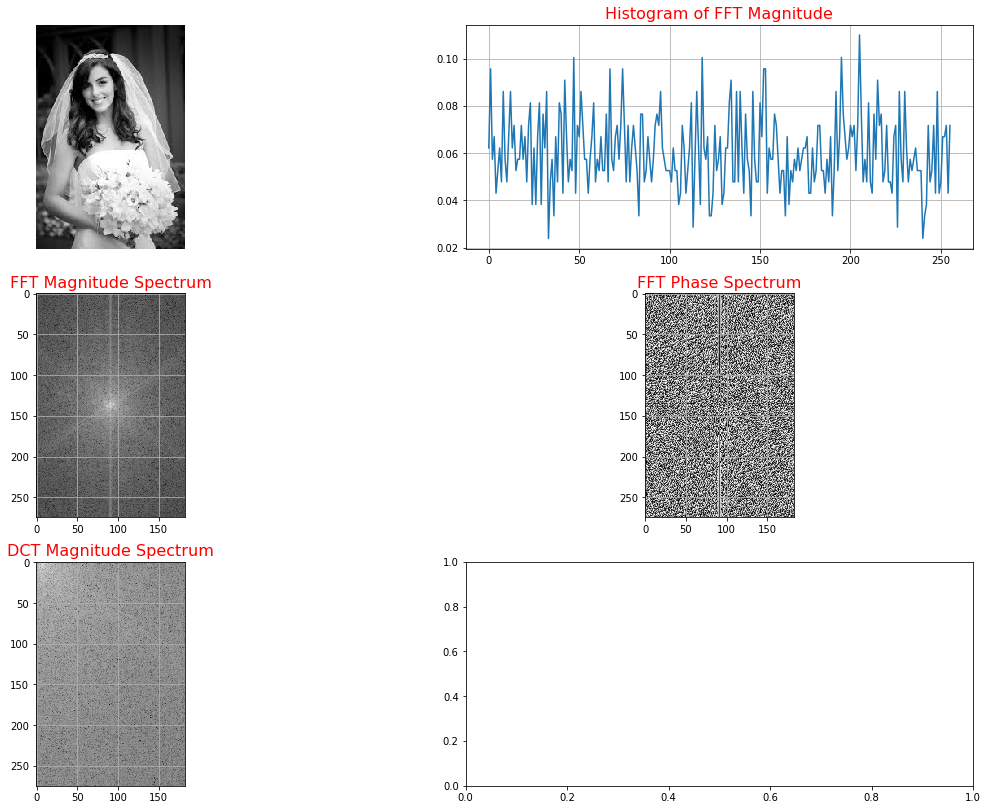

In [56]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=2, figsize=(20, 14))
ax1[0].set_axis_off()
ax1[0].imshow(img, cmap = 'gray')
ax1[1].grid()
ax1[1].set_title('Histogram of FFT Magnitude', fontsize=16, color="red")
ax1[1].plot(hist)
ax2[0].grid()
ax2[0].imshow(magnitude_spectrum, cmap = 'gray')
ax2[0].set_title('FFT Magnitude Spectrum', fontsize=16, color="red")
ax2[1].imshow(phase, cmap = 'gray')
ax2[1].grid()
ax2[1].set_title('FFT Phase Spectrum', fontsize=16, color="red")
ax3[0].grid()
ax3[0].imshow(dct_magnitude_spectrum, cmap = 'gray')
ax3[0].set_title('DCT Magnitude Spectrum', fontsize=16, color="red")
plt.show()

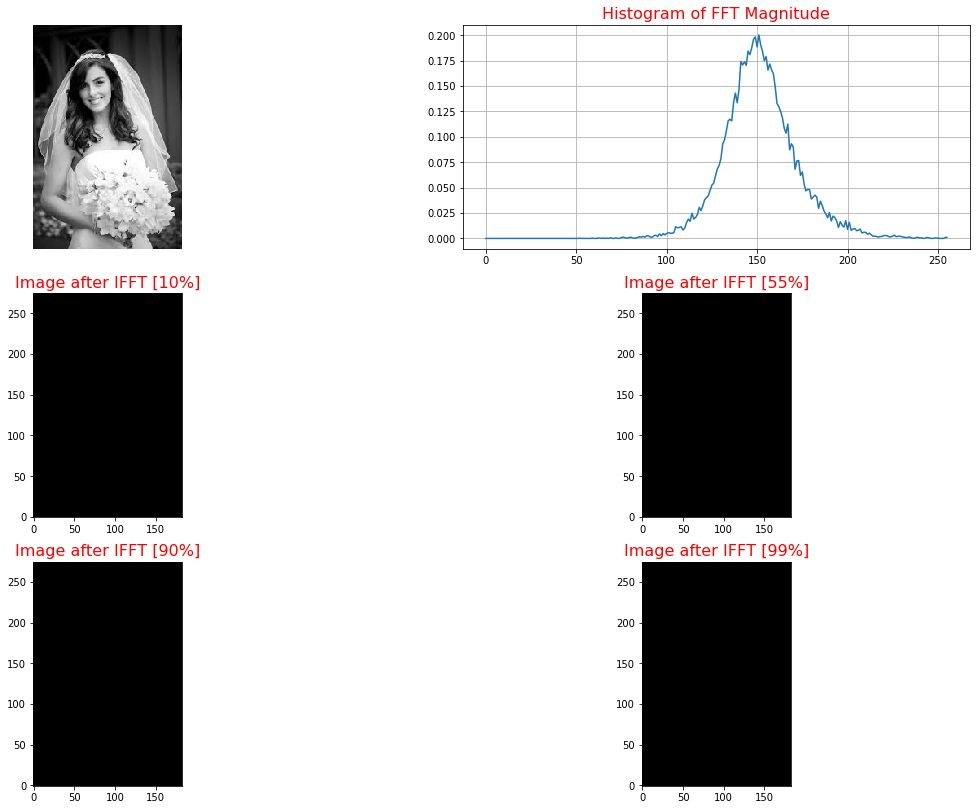

In [61]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=2, figsize=(20, 14))
ax1[0].set_axis_off()
ax1[0].imshow(img, cmap = 'gray')
ax1[1].grid()
ax1[1].set_title('Histogram of FFT Magnitude', fontsize=16, color="red")
ax1[1].plot(hist)
ax2[0].imshow(img_10, cmap = 'gray', origin="lower")
ax2[0].set_title('Image after IFFT [10%]', fontsize=16, color="red")
ax2[1].imshow(img_55, cmap = 'gray', origin="lower")
ax2[1].set_title('Image after IFFT [55%]', fontsize=16, color="red")
ax3[0].imshow(img_90, cmap = 'gray', origin="lower")
ax3[0].set_title('Image after IFFT [90%]', fontsize=16, color="red")
ax3[1].imshow(img_99, cmap = 'gray', origin="lower")
ax3[1].set_title('Image after IFFT [99%]', fontsize=16, color="red")
plt.show()